# 911 Calls Capstone Project

Importing required Libraries

Import Numpy and Pandas

In [50]:
import numpy as np
import pandas as pd

In [ ]:
Import Data Visualization Libraries

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Know your data and importing it into a Dataframe

Reading csv file containing the 911 calls data into a dataframe

In [52]:
df = pd.read_csv(r'C:\Users\saksh\Desktop\Penn\911.csv')


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [54]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Analyzing the Data using Basic Questions

In [55]:
#Find the top 5 zipcodes for 911 calls data.

df['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

In [56]:
#Find the top 5 townships for 911 calls data.

df['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [59]:
#Find the unique title codes.

df['title'].nunique()

133

# Creating new columns using the values from existing columns

In [67]:
df['reason'] = df['title'].apply(lambda reason:reason.split(':')[0])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [69]:
#No. of calls made for each reason.

df['reason'].value_counts().head()

EMS        161441
Traffic    116065
Fire        48919
Name: reason, dtype: int64

In [ ]:
# Seaborn: To create a countplot of 911 calls by reason

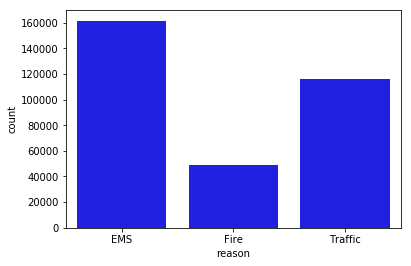

In [86]:
sns.countplot(x='reason',data=df,color='blue')

###### Using the timeStamp for more deeper data analysis 

In [89]:
# Checking the type of timeStamp

type(df['timeStamp'].iloc[0])

str

In [93]:
# Changing the type of timeStamp from string to date time object for analysis purpose

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [98]:
time = df['timeStamp'].iloc[0]

In [108]:
# Creating new columns Hour, Month and Day of Week for 

df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [110]:
# Mapping strings to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of week']=df['Day of week'].map(dmap)

In [ ]:
# Now we will analyze the 911 calls data using these new columns

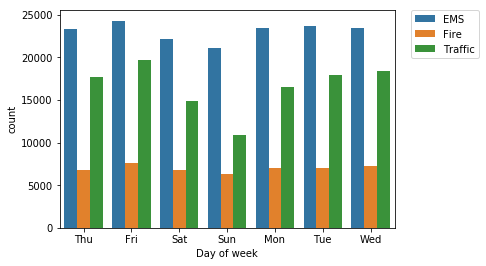

In [120]:
# Plot: Using Seaborn to 911 calls during different time intervals
sns.countplot(x ='Day of week',data=df, hue = 'reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

The above plot shows that the number of 911 calls were least on Sunday for all the three reasons : EMS, Fire and Traffic

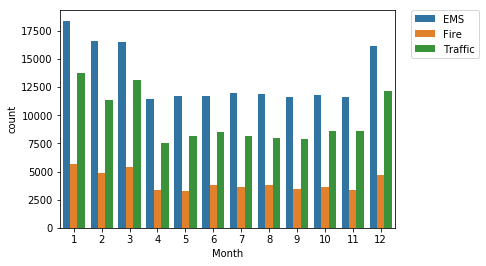

In [119]:
#Plot: 911 calls in a month
sns.countplot(x = 'Month', data = df, hue = 'reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

The above plot shows that the numbe of calls were decreasing starting from April till November and in December the number of calls increased again

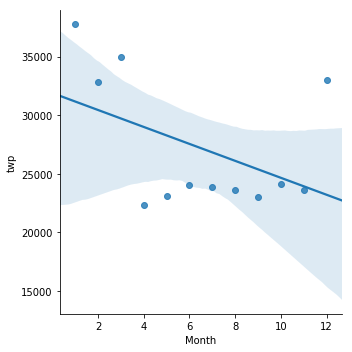

In [126]:
bymonth = df.groupby('Month').count()
sns.lmplot('Month', 'twp', data = bymonth.reset_index() )

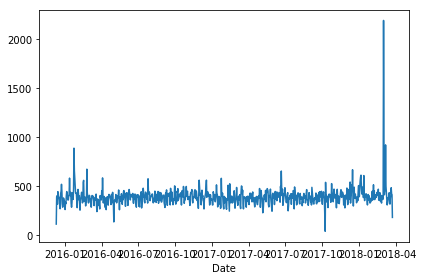

In [135]:
# Create a new column called 'Date' from timeStamp 
t = df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [ ]:
# Create three different plots each based ona different reason

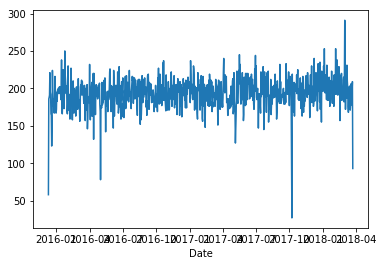

In [138]:
#Reason: EMS

df[df['reason']=='EMS'].groupby('Date').count() ['lat'].plot()

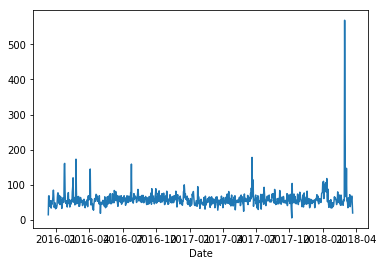

In [139]:
#Reason: Fire

df[df['reason']=='Fire'].groupby('Date').count() ['lat'].plot()

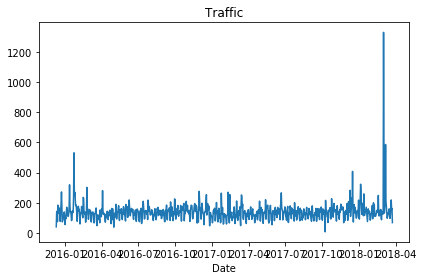

In [141]:
#Reason: Traffic

df[df['reason']=='Traffic'].groupby('Date').count() ['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [143]:
# Now we will create the HeatMap after restructuring the dataframe

day_hour = df.groupby(by = ['Day of week', 'Hour']).count().unstack()

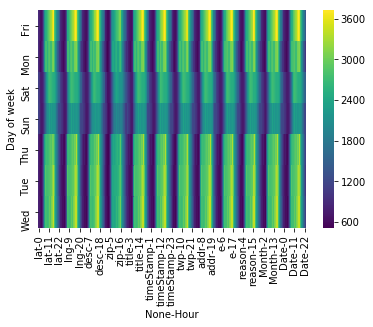

In [146]:
sns.heatmap(day_hour, cmap='viridis')

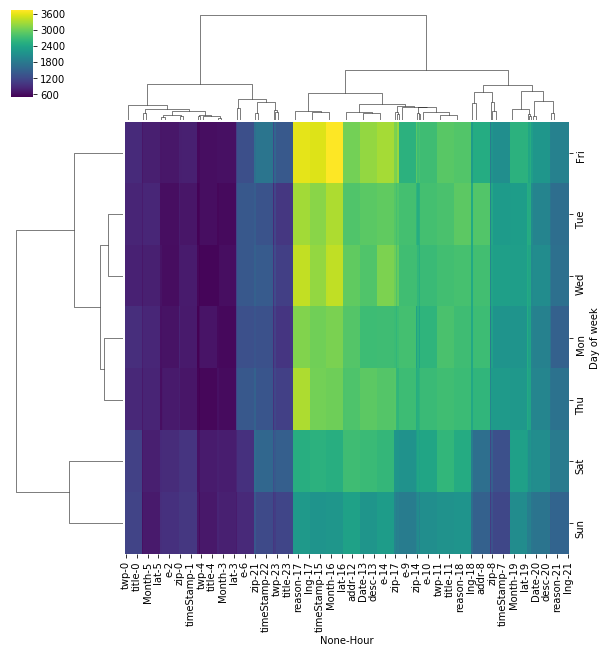

In [147]:
# Now we will create a cluster map

sns.clustermap(day_hour, cmap = 'viridis')

In [148]:
# Now we will create the heatmap and cluster plot using 'Month' as the column

day_hour = df.groupby(by = ['Day of week', 'Month']).count().unstack()

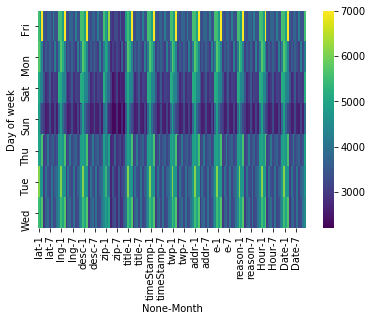

In [149]:
sns.heatmap(day_hour, cmap='viridis')

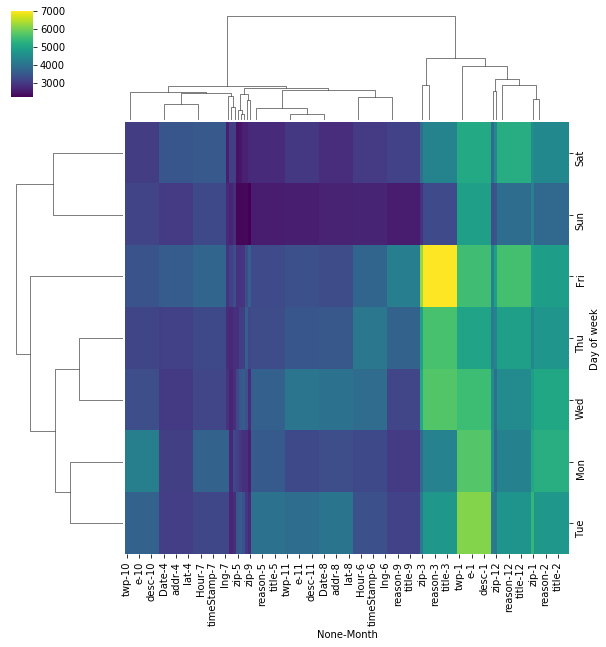

In [150]:
sns.clustermap(day_hour, cmap='viridis')